In [27]:
# Start here

#!pip install pandas seaborn
#!pip3 install --upgrade --force-reinstall --no-cache-dir jupyter

# Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats

# Warnings https://docs.python.org/3/library/warnings.html
import warnings
warnings.filterwarnings('ignore')

# Display preference
%matplotlib inline
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [28]:
# Load data
train = pd.read_csv('data/train.csv')
train.shape

(1460, 81)

### Data preview
First thing. A quick look to: 
- Data distribution
- Correlations among metrics

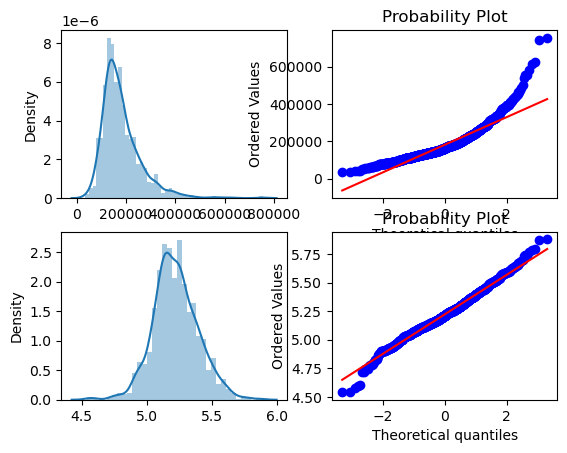

In [29]:
# Code from: https://www.kaggle.com/code/pmarcelino/comprehensive-data-exploration-with-python
fig, axes = plt.subplots(2,2)

# funciton to plot distribution 
def dist_plot(inputVector, rowIndex):
    sns.distplot(ax=axes[rowIndex,0], x=inputVector)
    stats.probplot(inputVector, plot=axes[rowIndex,1]) # qq plot

# Data has a long tail to the right
dist_plot(train['SalePrice'], 0)

# Log transform
dist_plot(np.log10(train['SalePrice']), 1)


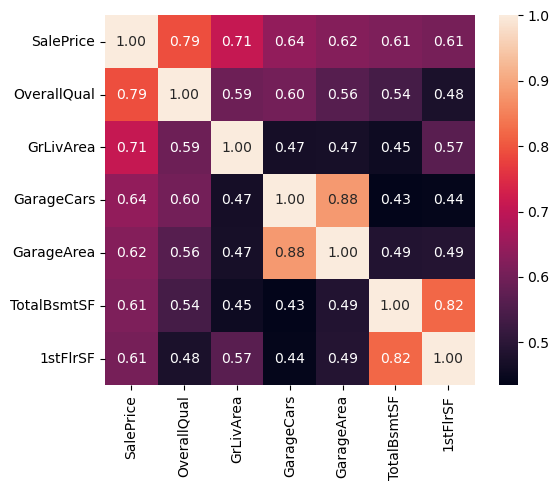

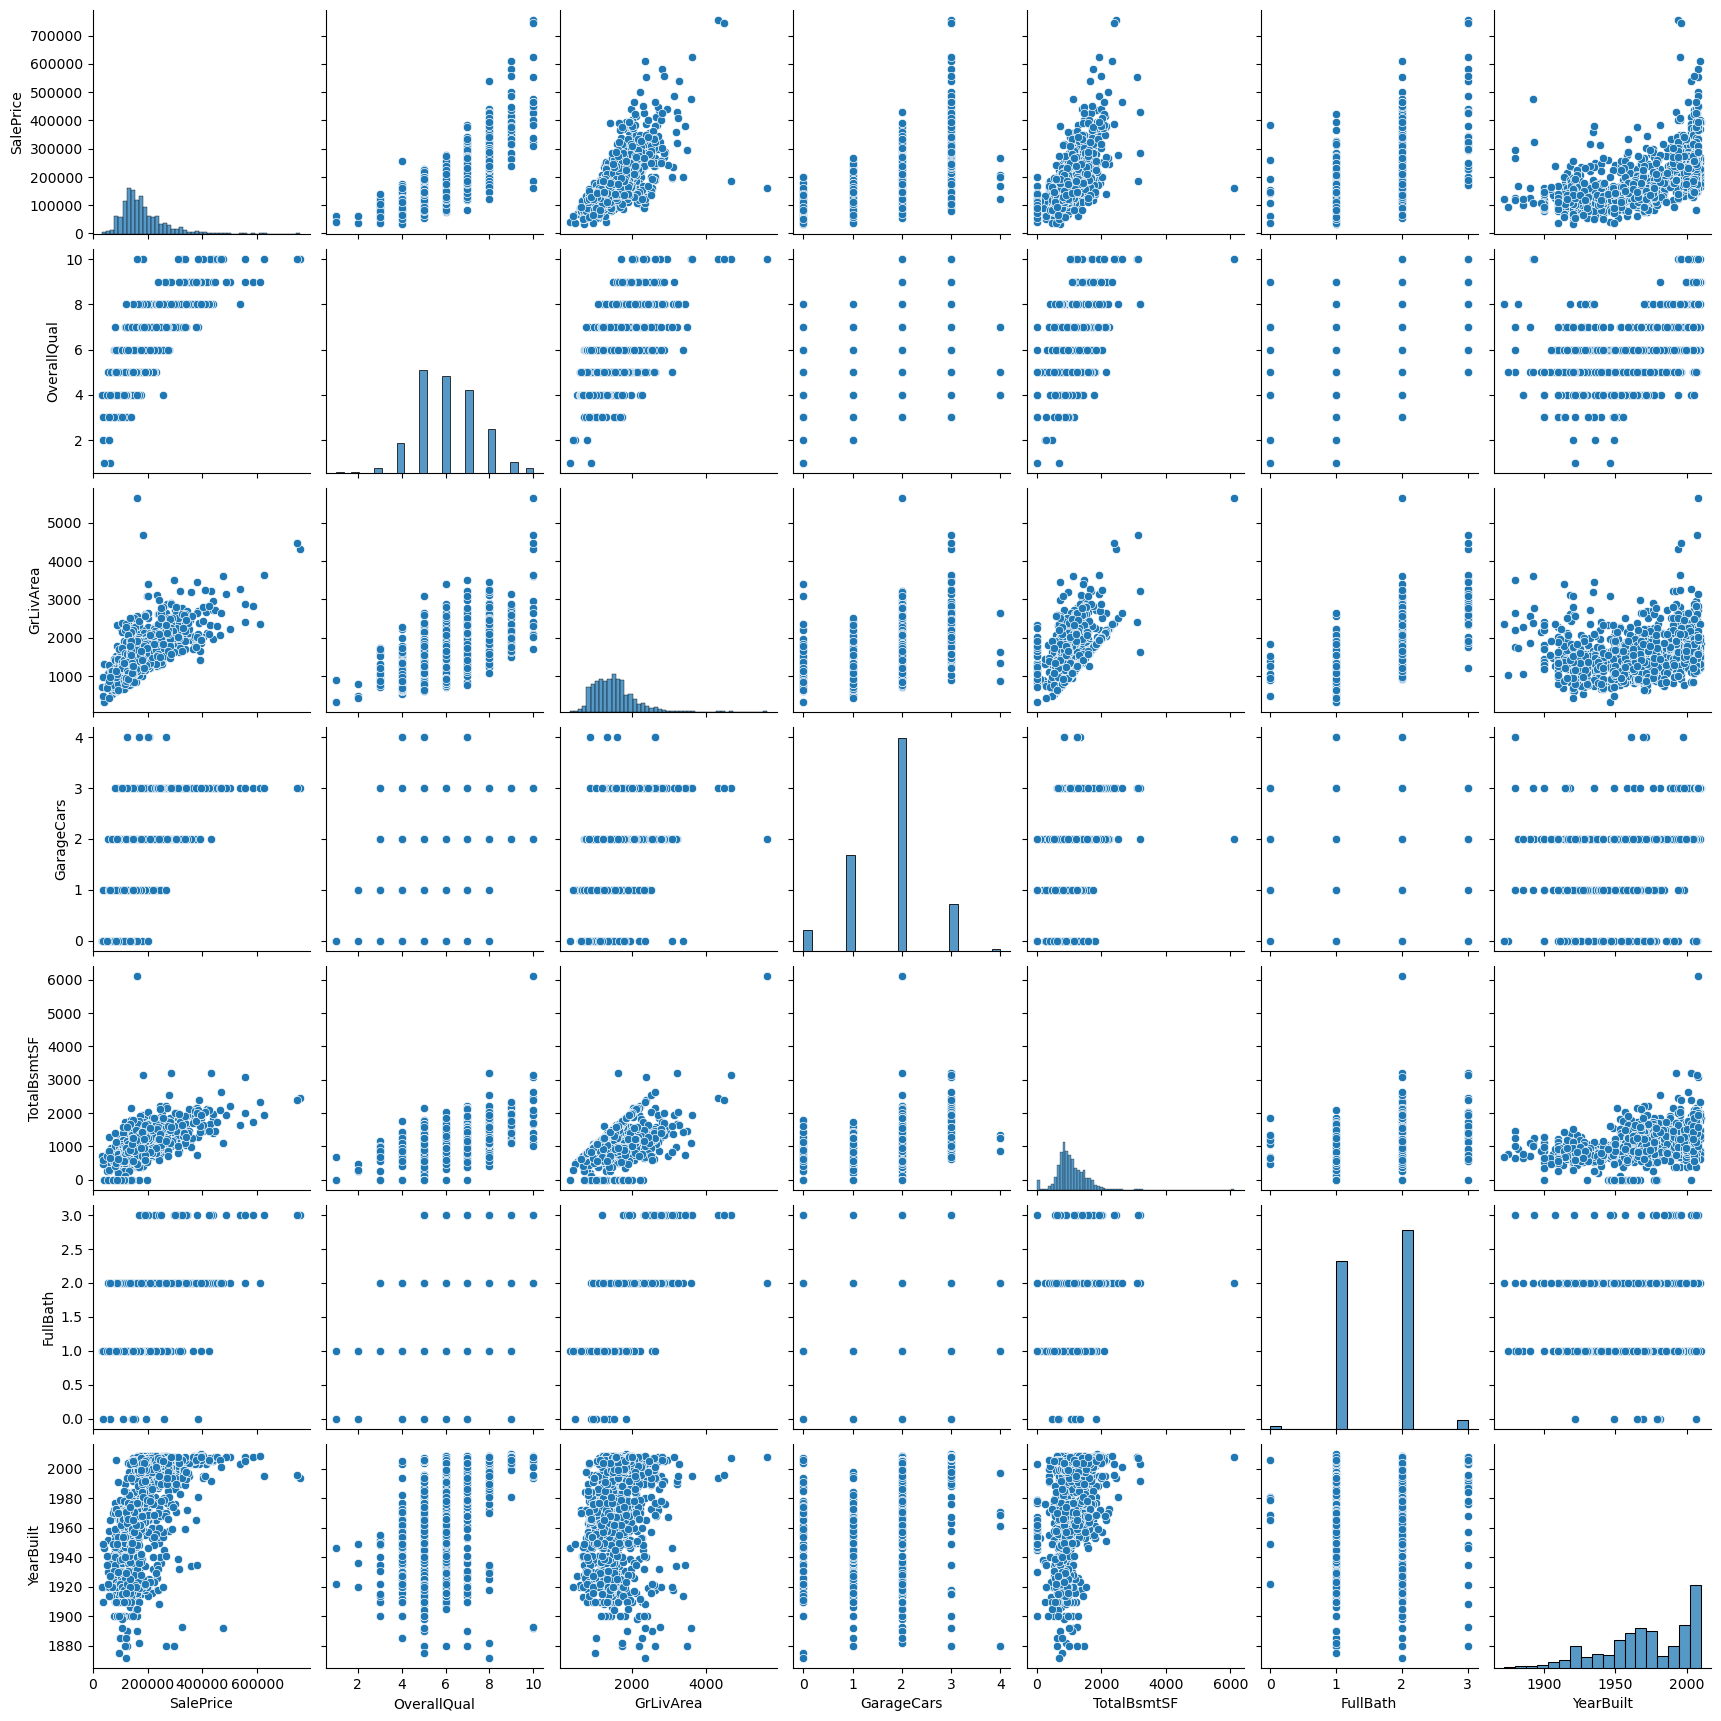

In [30]:
# Code from: https://www.kaggle.com/code/pmarcelino/comprehensive-data-exploration-with-python

# Correlation matrix
corrmat = train.corr()
# f, ax = plt.subplots(figsize=(20, 20))  # N cols limited to 20
# sns.heatmap(corrmat, vmax=.8, square=True)
# plt.show()

# Correlation matrix (limit to the most correlated metrics)
k = 7 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
#sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

# Pair plot
#sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(train[cols], size = 2.5)
plt.show()

### Data cleanup 
- missing values
- Zeros & constants
- Duplicates
- Outliers

Here, use a subset of data to simplify this exercise

In [31]:
# Ref: https://www.kaggle.com/code/juliencs/a-study-on-regression-applied-to-the-ames-dataset

cols = ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
t2 = train.loc[:,cols]

# Missing values
#t2.loc[:, "GarageArea"] = t2.loc[:, "GarageArea"].fillna(0)
t2.loc[:, "GarageCars"] = t2.loc[:, "GarageCars"].fillna(0)

# Log transform: log1p = log(1 + x)
# Generally a good idea for skewed numeric features
train.SalePriceLog1p = np.log1p(train.SalePrice)


# Models
- split to train and test sets (cross validation)
    - train the model (linear regression)
    - predict
- Avoid overfitting
- Compare models

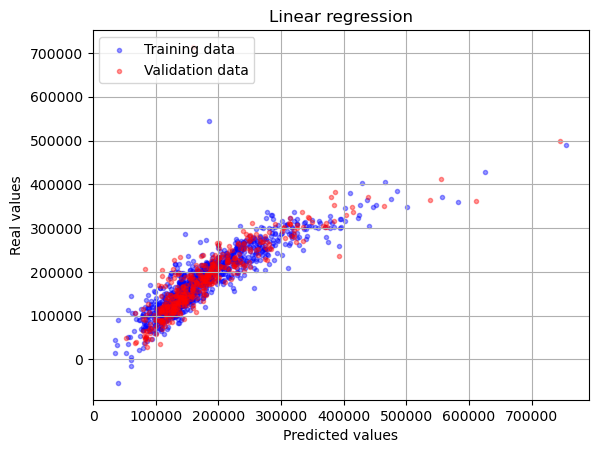

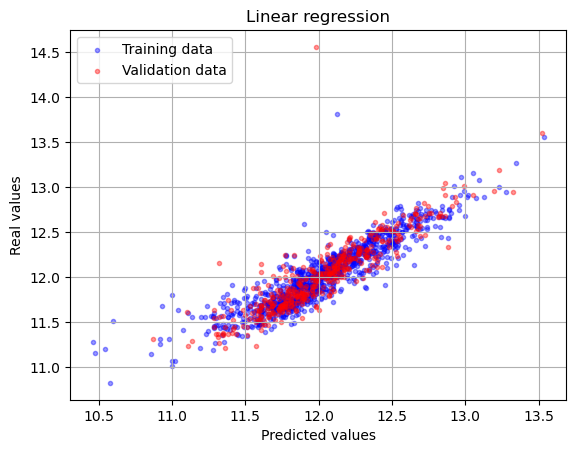

In [34]:
# ref: https://www.kaggle.com/code/juliencs/a-study-on-regression-applied-to-the-ames-dataset

from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.metrics import mean_squared_error, make_scorer

def model_and_predict(t2,y):
    '''Linear fit'''

    # Partition the dataset in train + validation sets
    X_train, X_test, y_train, y_test = train_test_split(t2, y, test_size = 0.3, random_state = 0)

    # Standardize numerical features
    stdSc = StandardScaler()
    X_train = stdSc.fit_transform(X_train)
    X_test = stdSc.transform(X_test)

    # Linear regression
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    y_train_pred = lr.predict(X_train)
    y_test_pred = lr.predict(X_test)

    # Plot predictions 
    plt.scatter(y_train, y_train_pred, c = "blue", marker = ".", label = "Training data",alpha=0.4)
    plt.scatter(y_test, y_test_pred, c = "red", marker = ".", label = "Validation data",alpha=0.4)
    plt.title("Linear regression")
    plt.xlabel("Predicted values")
    plt.ylabel("Real values")
    plt.legend(loc = "upper left")
    plt.grid()
    plt.show()

    # Plot RMSE

model_and_predict(t2, train.SalePrice)
model_and_predict(t2, train.SalePriceLog1p)

In [33]:
# Compare model performance